Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Colonnes disponibles : ['age', 'type_bac', 'parcours', 'moyenne_bac', 'moyenne_s1', 'moyenne_s2', 'moyenne_generale_s1_s2', 'nb_modules_echoues', 'heures_travail_semaine', 'discipline_note_sur_5', 'satisfaction_parcours_note_sur_5', 'travail_parallele', 'reussite_generale', 'resultat_final']

Corrélation des paramètres avec la réussite :
 reussite                            1.000000
moyenne_generale                    0.799334
moyenne_s1                          0.784170
moyenne_s2                          0.774049
discipline_note_sur_5               0.571009
heures_travail_semaine              0.235403
satisfaction_parcours_note_sur_5    0.171692
age                                -0.028971
nb_modules_echoues                 -0.672430
Name: reussite, dtype: float64


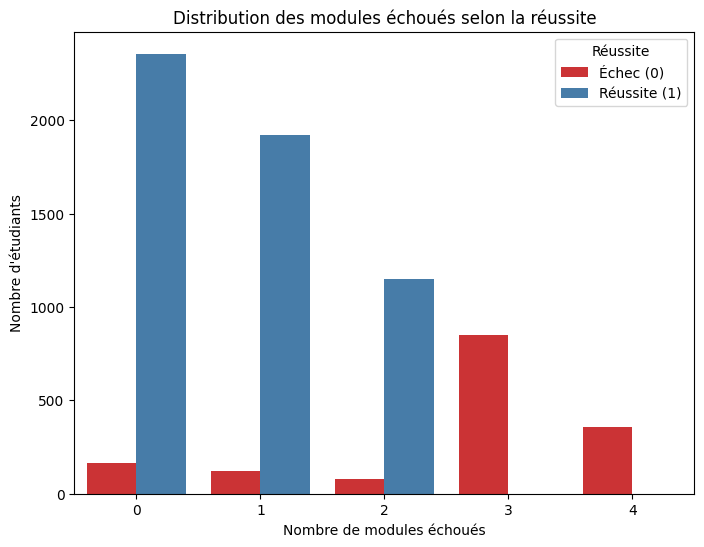

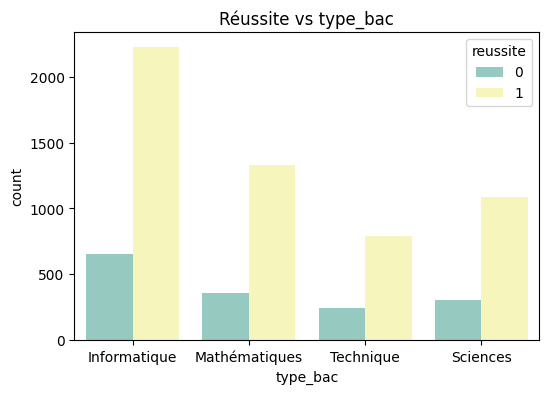

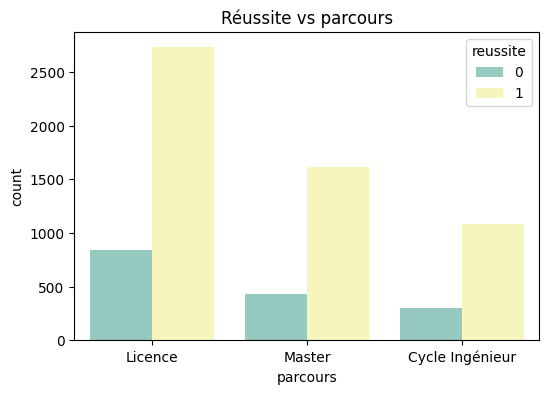

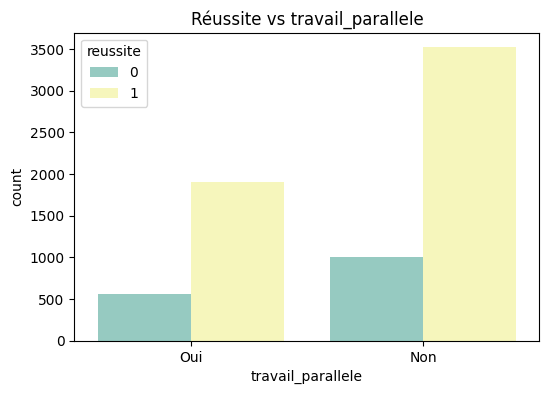

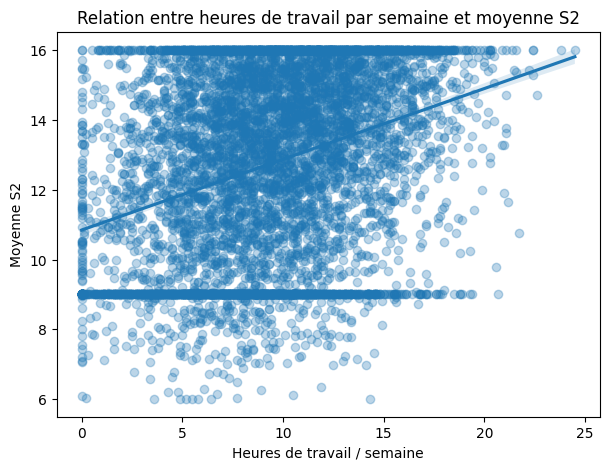

/tmp/ipython-input-4121449939.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="reussite", y="discipline_note_sur_5", palette="Pastel1")


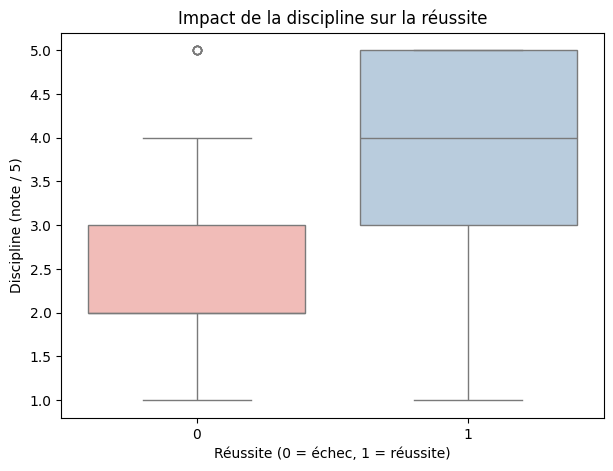

/tmp/ipython-input-4121449939.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="reussite", y="satisfaction_parcours_note_sur_5", palette="Set2")


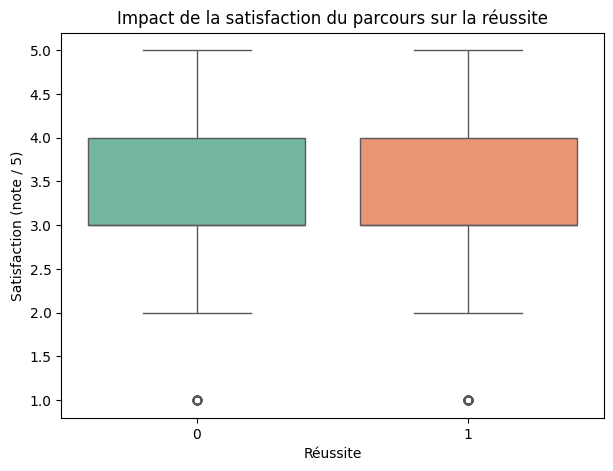

/tmp/ipython-input-4121449939.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="nb_modules_echoues", y="moyenne_generale", palette="Set3")


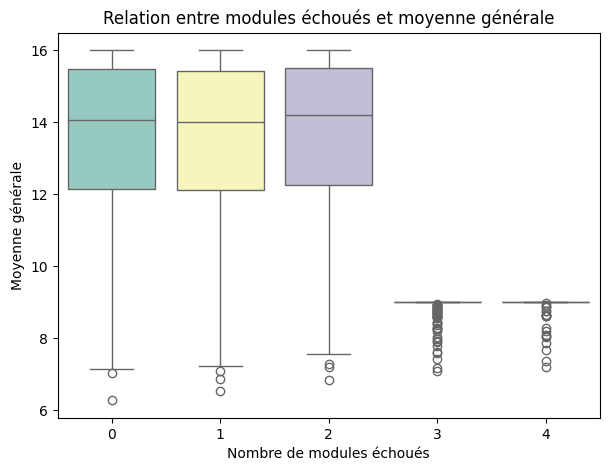

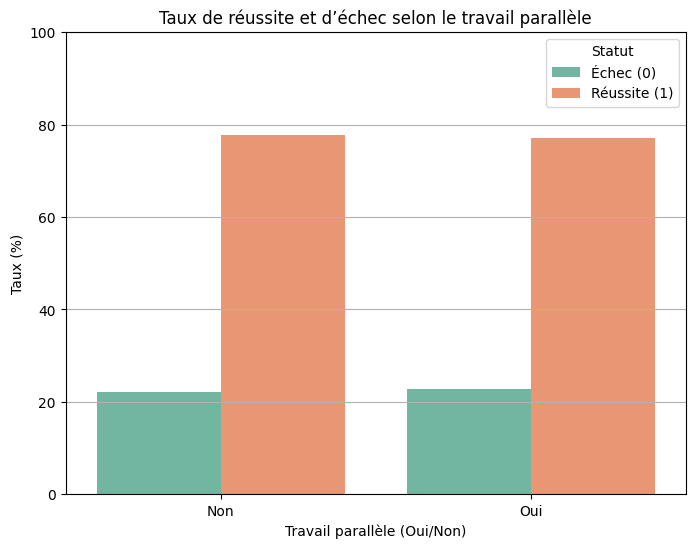


Matrice des corrélations :
                                   moyenne_generale  discipline_note_sur_5  \
moyenne_generale                          1.000000               0.716396   
discipline_note_sur_5                     0.716396               1.000000   
satisfaction_parcours_note_sur_5          0.228331               0.307966   
heures_travail_semaine                    0.305082               0.239963   
nb_modules_echoues                       -0.538474              -0.375377   

                                  satisfaction_parcours_note_sur_5  \
moyenne_generale                                          0.228331   
discipline_note_sur_5                                     0.307966   
satisfaction_parcours_note_sur_5                          1.000000   
heures_travail_semaine                                    0.081855   
nb_modules_echoues                                       -0.110644   

                                  heures_travail_semaine  nb_modules_echoues  
moyenne_

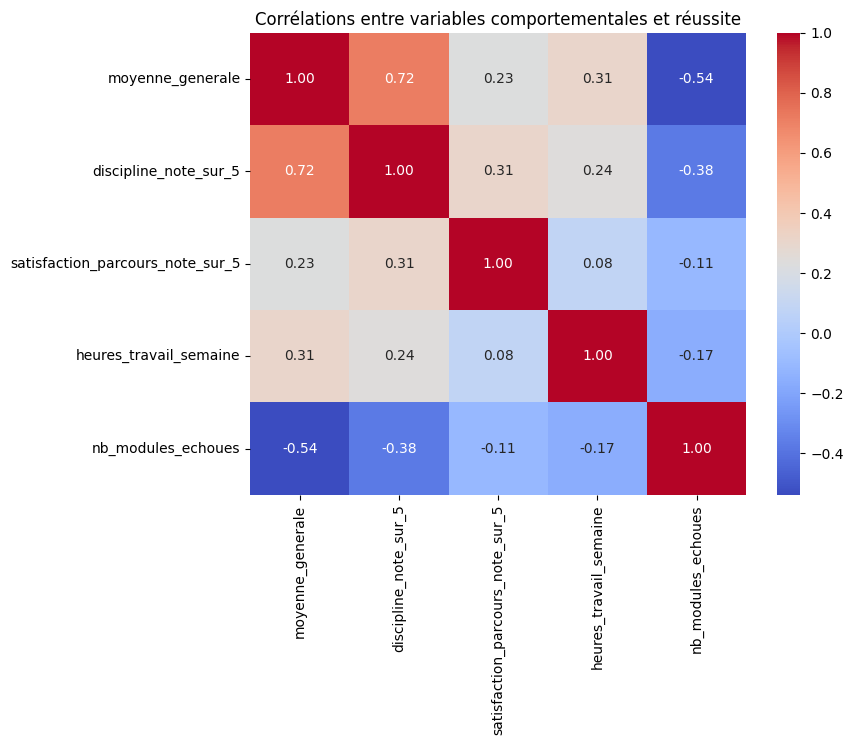

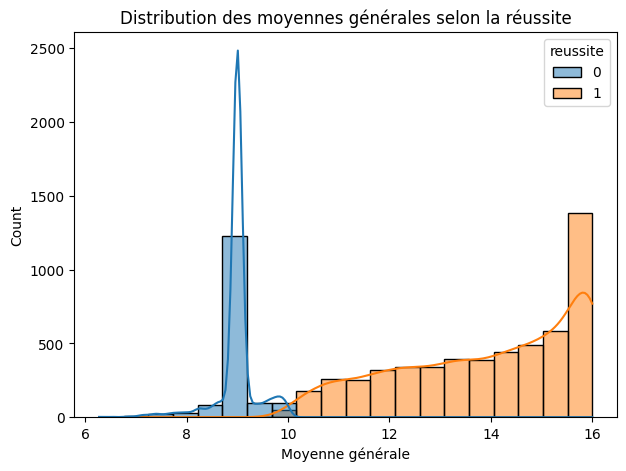

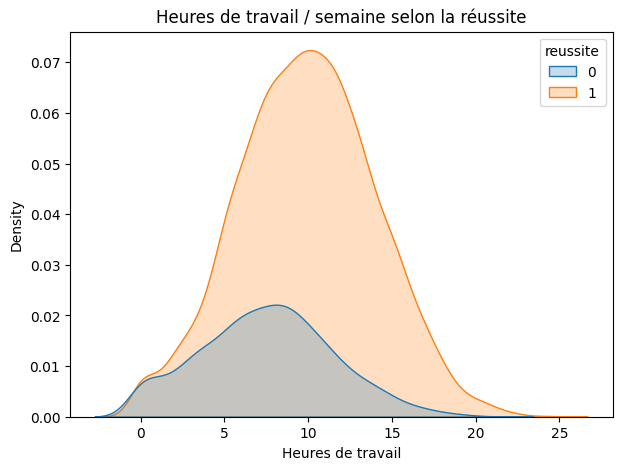

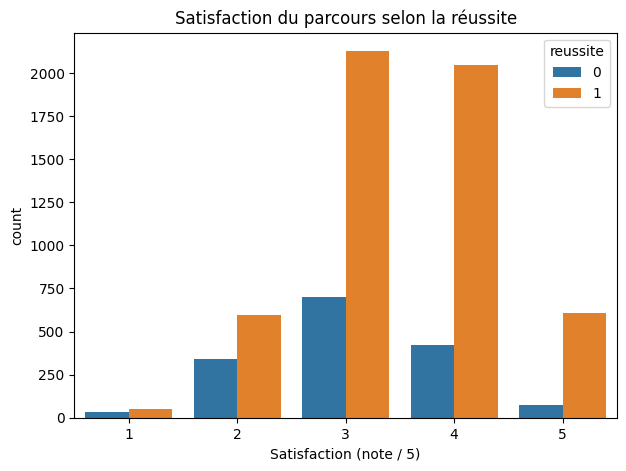

In [13]:

# ==============================================================================
# ÉTAPE 2 : ANALYSE DES DONNÉES
# ==============================================================================

# ============================
# 1️⃣ MOUNT GOOGLE DRIVE
# ============================
from google.colab import drive
drive.mount('/content/drive')


# ============================
# 1. ANALYSE EXPLORATOIRE
# ============================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# Chargement du dataset
# ----------------------------
dataset_path = "/content/drive/MyDrive/MP_python/dataset/dataset_reussite_etudiants_ISI.csv"

df = pd.read_csv(dataset_path)

# ----------------------------
# Normalisation des noms de colonnes
# (suppression espaces, majuscules, accents)
# ----------------------------
df.columns = [c.strip().lower().replace(" ", "_").replace("é", "e") for c in df.columns]
print("Colonnes disponibles :", df.columns.tolist())

# ----------------------------
# Vérification des colonnes obligatoires
# ----------------------------
for col in ["moyenne_s1", "moyenne_s2", "nb_modules_echoues"]:
    if col not in df.columns:
        raise ValueError(f"La colonne {col} est introuvable dans le dataset.")

# ----------------------------
# Création de la variable cible "réussite"
# ----------------------------
df["moyenne_generale"] = (df["moyenne_s1"] + df["moyenne_s2"]) / 2

df["reussite"] = df.apply(
    lambda row: 1 if row["moyenne_generale"] >= 10 and row["nb_modules_echoues"] < 3 else 0,
    axis=1
)

# ----------------------------
# Définition des variables numériques
# ----------------------------
num_cols = [
    "age",
    "moyenne_s1",
    "moyenne_s2",
    "moyenne_generale",
    "nb_modules_echoues",
    "heures_travail_semaine",
    "discipline_note_sur_5",
    "satisfaction_parcours_note_sur_5"
]

# ----------------------------
# Analyse des corrélations avec la réussite
# ----------------------------
corr = df[num_cols + ["reussite"]].corr()["reussite"].sort_values(ascending=False)
print("\nCorrélation des paramètres avec la réussite :\n", corr)

# ----------------------------
# Histogramme : Modules échoués vs Réussite
# ----------------------------
plt.figure(figsize=(8, 6))
sns.countplot(x="nb_modules_echoues", hue="reussite", data=df, palette="Set1")
plt.title("Distribution des modules échoués selon la réussite")
plt.xlabel("Nombre de modules échoués")
plt.ylabel("Nombre d'étudiants")
plt.legend(title="Réussite", labels=["Échec (0)", "Réussite (1)"])
plt.show()

# ----------------------------
# Impact des variables catégorielles
# ----------------------------
for col in ["type_bac", "parcours", "travail_parallele"]:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue="reussite", data=df, palette="Set3")
        plt.title(f"Réussite vs {col}")
        plt.show()


# ============================
# 2. ANALYSE COMPORTEMENTALE
# ============================

# Heures de travail vs Moyenne S2
plt.figure(figsize=(7, 5))
sns.regplot(
    data=df,
    x="heures_travail_semaine",
    y="moyenne_s2",
    scatter_kws={"alpha": 0.3}
)
plt.title("Relation entre heures de travail par semaine et moyenne S2")
plt.xlabel("Heures de travail / semaine")
plt.ylabel("Moyenne S2")
plt.show()

# Discipline vs Réussite
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="reussite", y="discipline_note_sur_5", palette="Pastel1")
plt.title("Impact de la discipline sur la réussite")
plt.xlabel("Réussite (0 = échec, 1 = réussite)")
plt.ylabel("Discipline (note / 5)")
plt.show()

# Satisfaction vs Réussite
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="reussite", y="satisfaction_parcours_note_sur_5", palette="Set2")
plt.title("Impact de la satisfaction du parcours sur la réussite")
plt.xlabel("Réussite")
plt.ylabel("Satisfaction (note / 5)")
plt.show()

# Modules échoués vs Moyenne générale
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="nb_modules_echoues", y="moyenne_generale", palette="Set3")
plt.title("Relation entre modules échoués et moyenne générale")
plt.xlabel("Nombre de modules échoués")
plt.ylabel("Moyenne générale")
plt.show()


# ============================
# Taux de réussite selon travail parallèle
# ============================

# Calcul des taux en %
taux_df = (
    df.groupby("travail_parallele")["reussite"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

taux_df.columns = ["Échec (0)", "Réussite (1)"]

# Transformation pour affichage
taux_df_reset = taux_df.reset_index().melt(
    id_vars="travail_parallele",
    var_name="Statut",
    value_name="Taux (%)"
)

# Histogramme
plt.figure(figsize=(8, 6))
sns.barplot(
    data=taux_df_reset,
    x="travail_parallele",
    y="Taux (%)",
    hue="Statut",
    palette="Set2"
)
plt.title("Taux de réussite et d’échec selon le travail parallèle")
plt.xlabel("Travail parallèle (Oui/Non)")
plt.ylabel("Taux (%)")
plt.ylim(0, 100)
plt.legend(title="Statut")
plt.grid(axis="y")
plt.show()


# ============================
# 3. CORRÉLATIONS AVANCÉES
# ============================

cols_corr = [
    "moyenne_generale",
    "discipline_note_sur_5",
    "satisfaction_parcours_note_sur_5",
    "heures_travail_semaine",
    "nb_modules_echoues"
]

corr_matrix = df[cols_corr].corr()
print("\nMatrice des corrélations :\n", corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre variables comportementales et réussite")
plt.show()


# ============================
# 4. AUTRES VISUALISATIONS
# ============================

# Distribution des moyennes générales
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x="moyenne_generale", hue="reussite", kde=True)
plt.title("Distribution des moyennes générales selon la réussite")
plt.xlabel("Moyenne générale")
plt.show()

# Heures de travail selon réussite
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x="heures_travail_semaine", hue="reussite", fill=True)
plt.title("Heures de travail / semaine selon la réussite")
plt.xlabel("Heures de travail")
plt.show()

# Satisfaction selon réussite
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="satisfaction_parcours_note_sur_5", hue="reussite")
plt.title("Satisfaction du parcours selon la réussite")
plt.xlabel("Satisfaction (note / 5)")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
